# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import pickle

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Read Dataset

In [3]:
df = pd.read_csv('../data/input/input_dataset.csv')

print('Before dropping rows with NA values \t: ', df.shape)
df = df.dropna(axis=0).reset_index(drop=True)
print('After dropping rows with NA values \t: ', df.shape)

Before dropping rows with NA values 	:  (2797, 38)
After dropping rows with NA values 	:  (2559, 38)


In [4]:
df.head()

,Referee,Day Of Week,Round,Days,Shots,ShotsOT,Corners,Fouls,YCards,RCards,GoalsScored,GoalsScoredHA,GoalsConceded,GoalsConcededHA,GoalsDiff,GoalsDiffHA,HTGoalsScored,HTGoalsConceded,HTGoalsScoredHA,HTGoalsConcededHA,HTGoalsDiff,HTGoalsDiffHA,Points,PointsHA,WinPercent,WinPercentHA,WinStreak,UnbPercent,UnbPercentHA,UnbStreak,Def,Mid,Att,Ovr,WinnerOdd,DrawOdd,Venue,Result
0,P Dowd,Wed,0.0,-1,4.8,2.0,2.3,-2.2,-0.3,0.0,0.4,0.4,-0.4,-0.4,8.0,8.0,0.3,0.1,-0.1,-0.2,2.0,1.0,0.4,0.5,10.0,20.0,1.0,20.0,10.0,1.0,5,5,2,4.00,-7.10,4.5,Anfield,W
1,A Taylor,Sat,0.0,0,-1.0,-2.2,-0.6,0.6,0.3,0.1,-0.1,0.3,0.6,0.3,-7.0,0.0,-0.4,0.0,0.0,0.1,-4.0,-1.0,-0.5,0.0,-20.0,0.0,-1.0,-10.0,0.0,0.0,0,-5,-5,-3.33,-1.65,3.4,DW Stadium,L
2,L Mason,Sat,0.0,-1,-5.0,-4.3,-1.0,-0.1,0.3,0.0,-0.3,0.7,0.5,0.2,-8.0,5.0,-0.6,0.2,-0.2,0.2,-8.0,-4.0,-0.5,0.3,-20.0,0.0,0.0,-10.0,30.0,0.0,-4,-5,-4,-4.33,-0.50,3.4,Madejski Stadium,W
3,R East,Sat,0.0,0,2.0,0.1,0.9,-0.1,0.0,0.1,0.1,0.2,0.1,-0.6,0.0,8.0,-0.4,0.0,-0.2,-0.3,-4.0,1.0,-0.2,0.4,-10.0,10.0,1.0,0.0,20.0,1.0,-3,0,-3,-2.00,-1.95,3.5,The Hawthorns,W
4,M Jones,Sat,0.0,0,0.1,-1.0,-0.9,-0.7,0.1,0.0,-0.6,-0.6,-0.1,-0.4,-5.0,-2.0,-0.5,0.0,-0.6,0.0,-5.0,-6.0,-0.1,-0.2,-10.0,-20.0,1.0,10.0,20.0,0.0,0,-1,2,0.34,-1.25,3.4,Loftus Road,W


# 3. Feature Selection

In [5]:
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

## 3.1 Correlation Analysis

In [6]:
df.columns

Index(['Referee', 'Day Of Week', 'Round', 'Days', 'Shots', 'ShotsOT',
       'Corners', 'Fouls', 'YCards', 'RCards', 'GoalsScored', 'GoalsScoredHA',
       'GoalsConceded', 'GoalsConcededHA', 'GoalsDiff', 'GoalsDiffHA',
       'HTGoalsScored', 'HTGoalsConceded', 'HTGoalsScoredHA',
       'HTGoalsConcededHA', 'HTGoalsDiff', 'HTGoalsDiffHA', 'Points',
       'PointsHA', 'WinPercent', 'WinPercentHA', 'WinStreak', 'UnbPercent',
       'UnbPercentHA', 'UnbStreak', 'Def', 'Mid', 'Att', 'Ovr', 'WinnerOdd',
       'DrawOdd', 'Venue', 'Result'],
      dtype='object')

In [7]:
# We drop variables related to team form specifically in home matches or away matches.
df = df.drop([
    'GoalsScoredHA', 'GoalsConcededHA', 'GoalsDiffHA', 
    'HTGoalsScoredHA', 'HTGoalsConcededHA', 'HTGoalsDiffHA', 
    'PointsHA', 'WinPercentHA', 'UnbPercentHA'
], axis=1)

In [8]:
df.columns

Index(['Referee', 'Day Of Week', 'Round', 'Days', 'Shots', 'ShotsOT',
       'Corners', 'Fouls', 'YCards', 'RCards', 'GoalsScored', 'GoalsConceded',
       'GoalsDiff', 'HTGoalsScored', 'HTGoalsConceded', 'HTGoalsDiff',
       'Points', 'WinPercent', 'WinStreak', 'UnbPercent', 'UnbStreak', 'Def',
       'Mid', 'Att', 'Ovr', 'WinnerOdd', 'DrawOdd', 'Venue', 'Result'],
      dtype='object')

In [9]:
df.shape

(2559, 29)

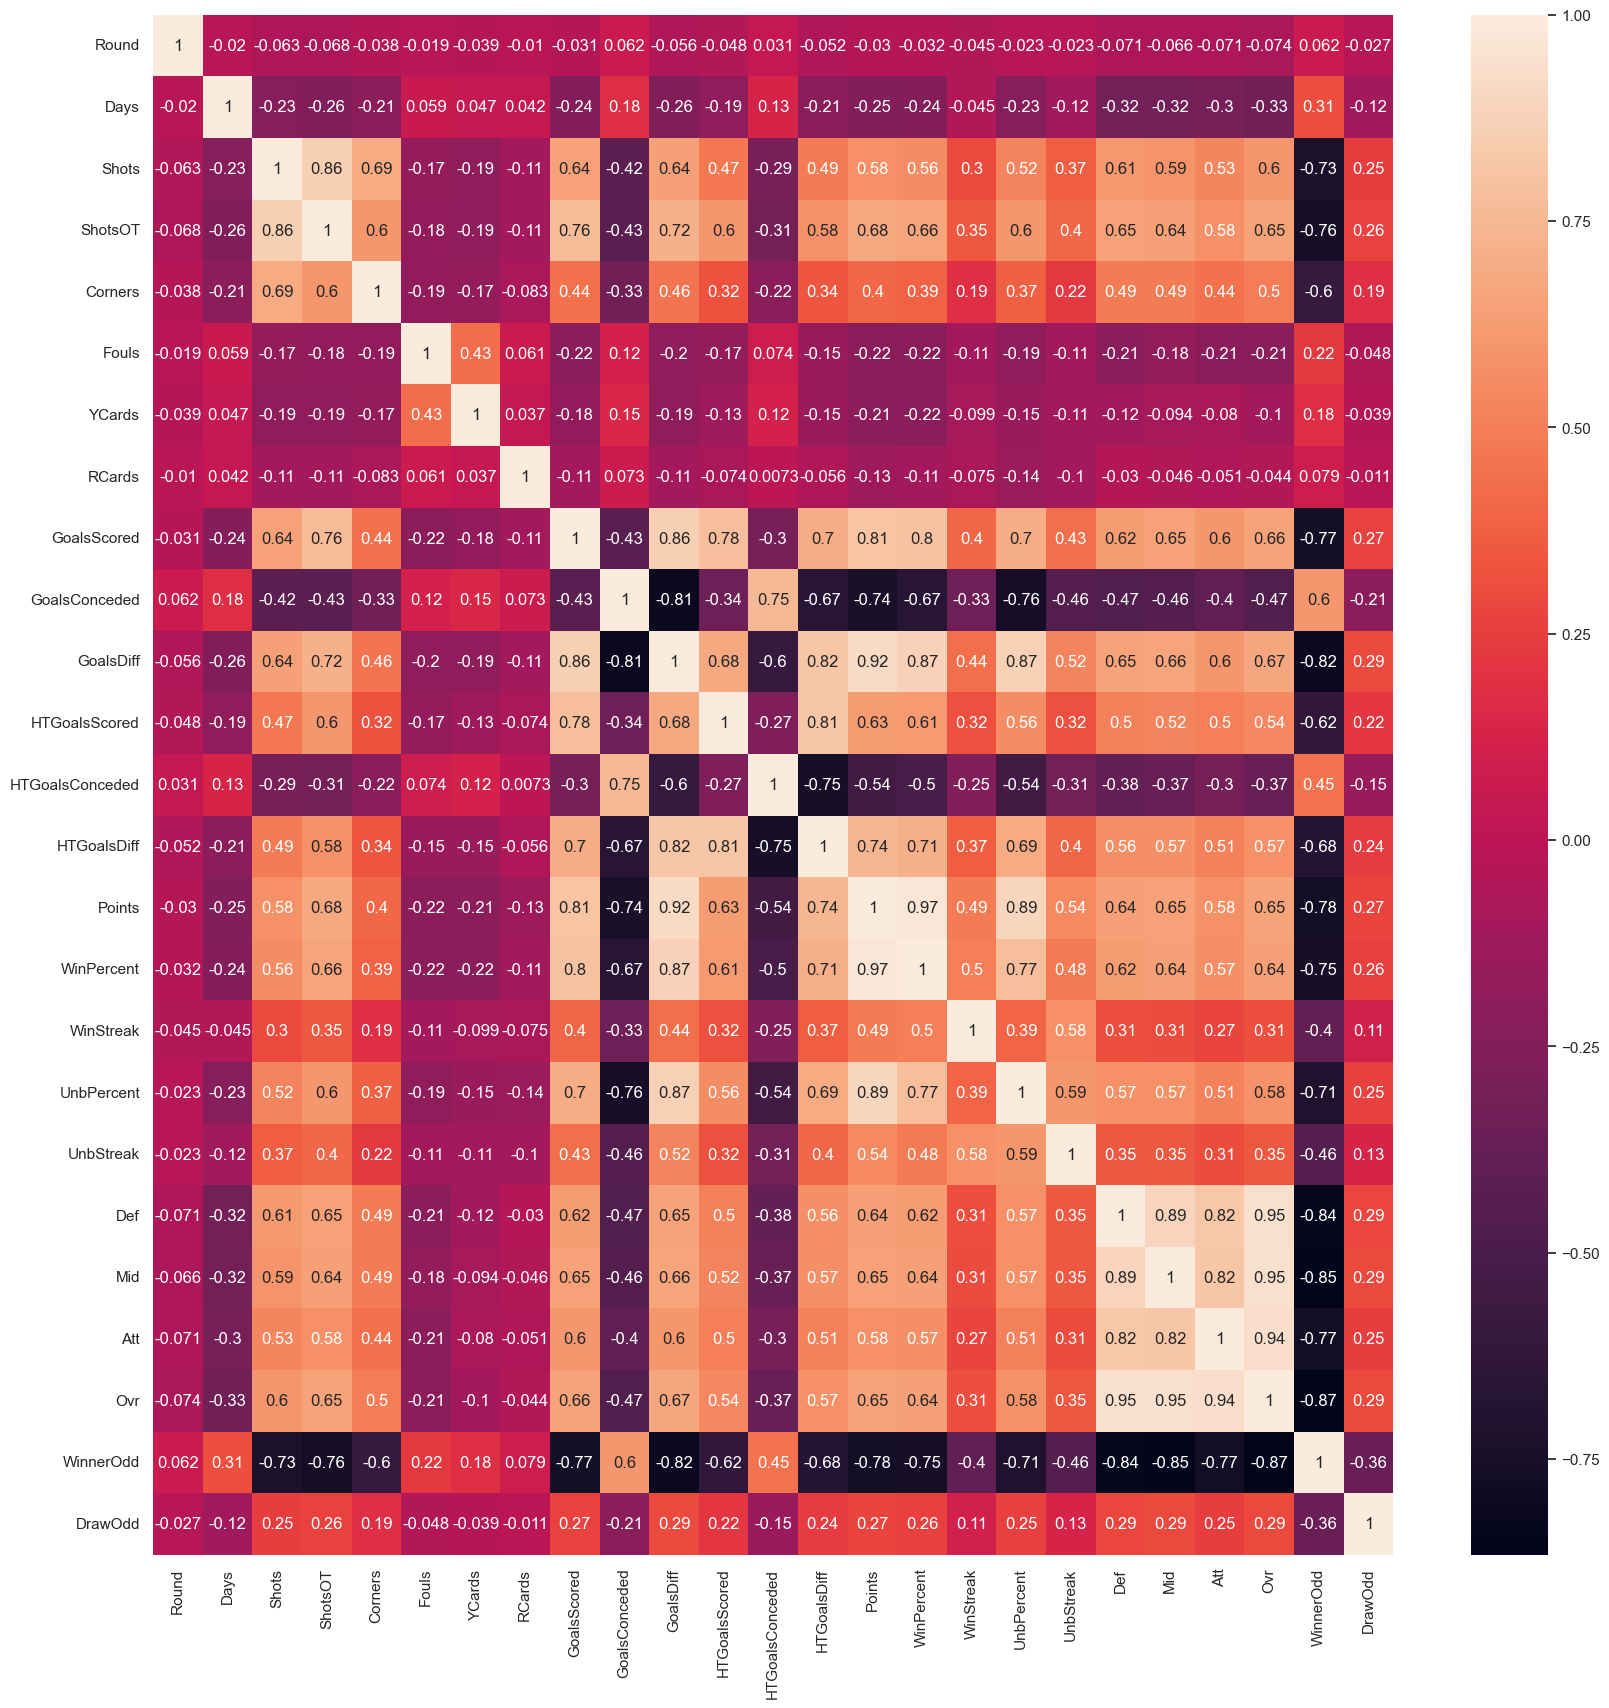

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr('spearman', numeric_only=True), annot=True)
plt.show()

In [11]:
# Take one of Shots, ShotsOT
# Take one of GoalsDiff, GoalsScored, GoalsConceded, HTGoalsDiff, HTGoalsScored, HTGoalsConceded, Points, WinPercent, UnbPercent
# Take one of Def, Mid, Att, Ovr
# Drop 'WinnerOdd'

df = df.drop([
              'ShotsOT',
              'GoalsDiff', 'GoalsScored', 'GoalsConceded', 'HTGoalsDiff', 'HTGoalsScored', 'HTGoalsConceded', 'WinPercent', 'UnbPercent',
              'Def', 'Mid', 'Att',
              'WinnerOdd'
             ], axis=1)

In [12]:
df.shape

(2559, 16)

C:\Users\choibs\AppData\Local\Temp\ipykernel_8304\1726572948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), annot=True)


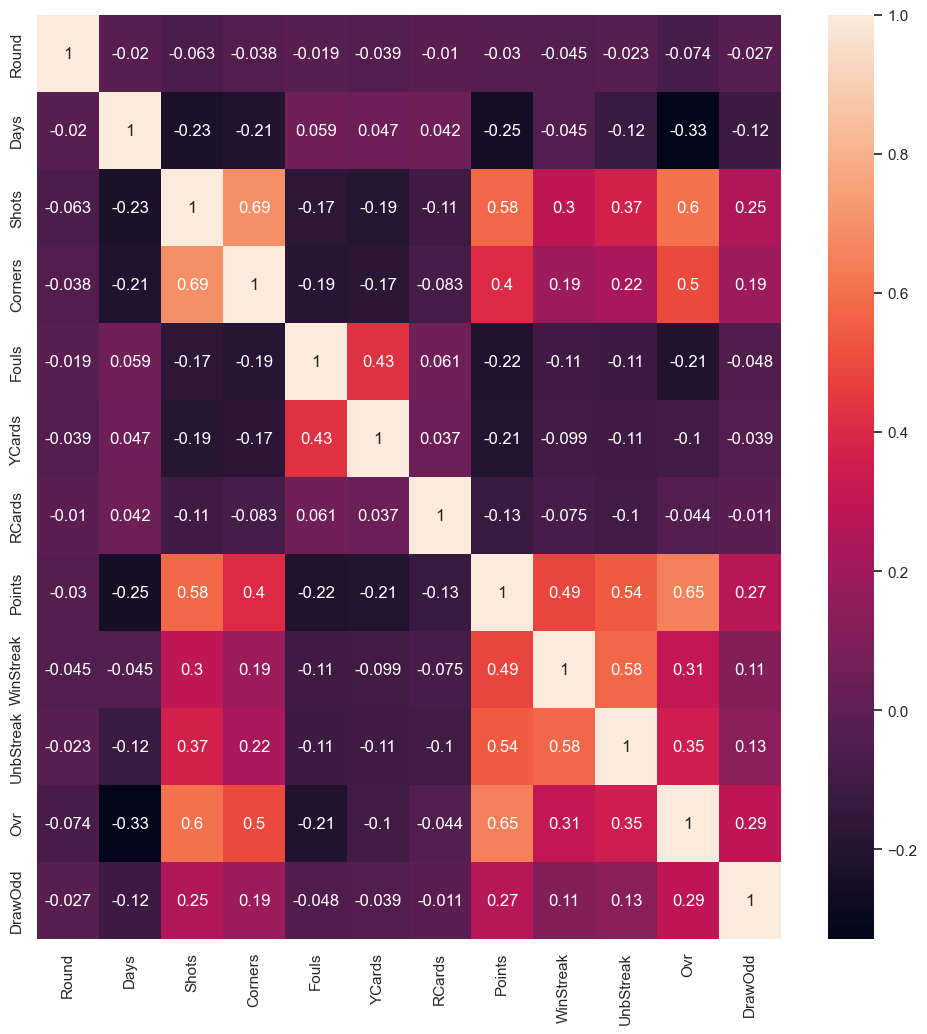

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [14]:
df.head()

,Referee,Day Of Week,Round,Days,Shots,Corners,Fouls,YCards,RCards,Points,WinStreak,UnbStreak,Ovr,DrawOdd,Venue,Result
0,P Dowd,Wed,0.0,-1,4.8,2.3,-2.2,-0.3,0.0,0.4,1.0,1.0,4.00,4.5,Anfield,W
1,A Taylor,Sat,0.0,0,-1.0,-0.6,0.6,0.3,0.1,-0.5,-1.0,0.0,-3.33,3.4,DW Stadium,L
2,L Mason,Sat,0.0,-1,-5.0,-1.0,-0.1,0.3,0.0,-0.5,0.0,0.0,-4.33,3.4,Madejski Stadium,W
3,R East,Sat,0.0,0,2.0,0.9,-0.1,0.0,0.1,-0.2,1.0,1.0,-2.00,3.5,The Hawthorns,W
4,M Jones,Sat,0.0,0,0.1,-0.9,-0.7,0.1,0.0,-0.1,1.0,0.0,0.34,3.4,Loftus Road,W


In [15]:
df.shape

(2559, 16)

## 3.2 BoxPlot Analysis

Next, we plot boxplots between all the features and the target variable (Result) to verify the relationship between all variables and the Result. The idea here is to identify and eliminate variables that do not contribute to the prediction of the Result variable.

In [16]:
df.columns

Index(['Referee', 'Day Of Week', 'Round', 'Days', 'Shots', 'Corners', 'Fouls',
       'YCards', 'RCards', 'Points', 'WinStreak', 'UnbStreak', 'Ovr',
       'DrawOdd', 'Venue', 'Result'],
      dtype='object')

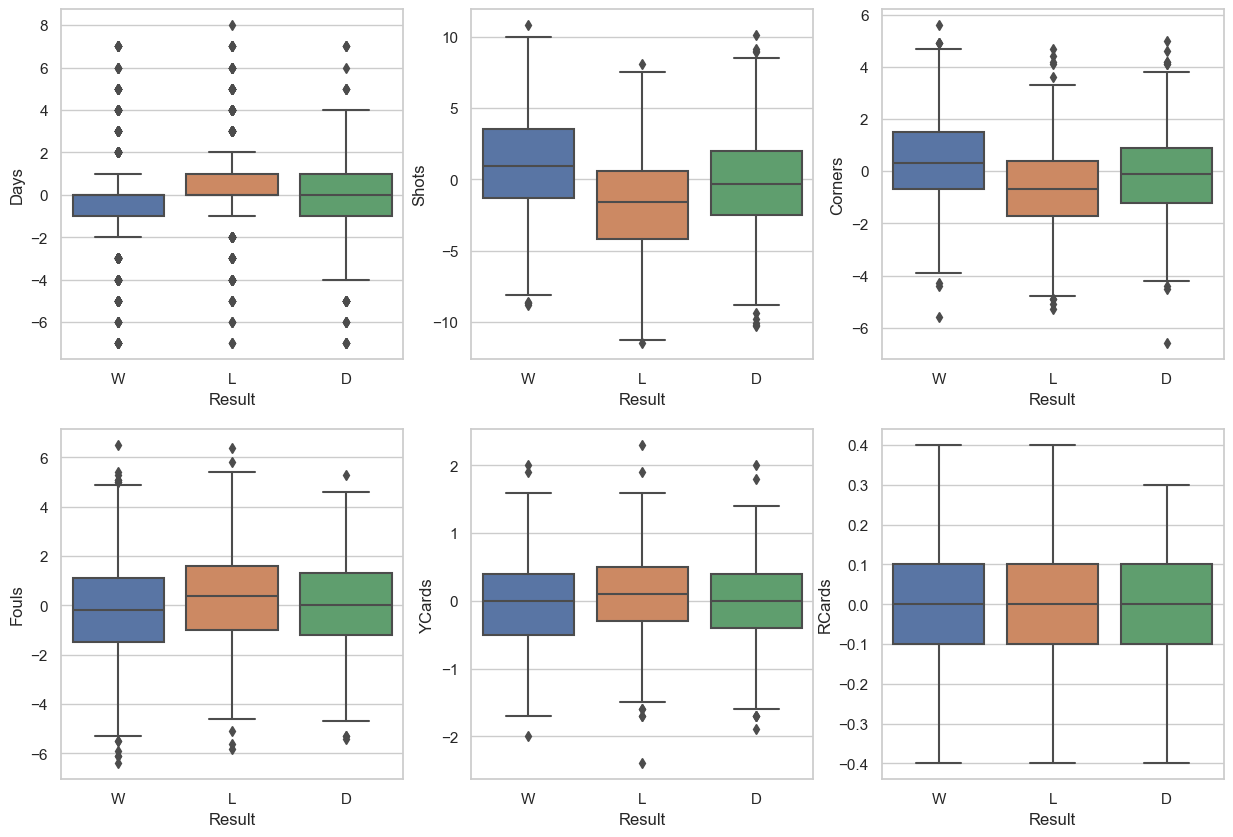

<Figure size 640x480 with 0 Axes>

In [20]:
# Days, Shots, Corners, Fouls, YCards and RCards

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=df["Result"], y=df['Days'])

plt.subplot(2, 3, 2)
sns.boxplot(x=df["Result"], y=df['Shots'])

plt.subplot(2, 3, 3)
sns.boxplot(x=df["Result"], y=df['Corners'])

plt.subplot(2, 3, 4)
sns.boxplot(x=df["Result"], y=df['Fouls'])

plt.subplot(2, 3, 5)
sns.boxplot(x=df["Result"], y=df['YCards'])

plt.subplot(2, 3, 6)
sns.boxplot(x=df["Result"], y=df['RCards'])

plt.show()
plt.tight_layout()

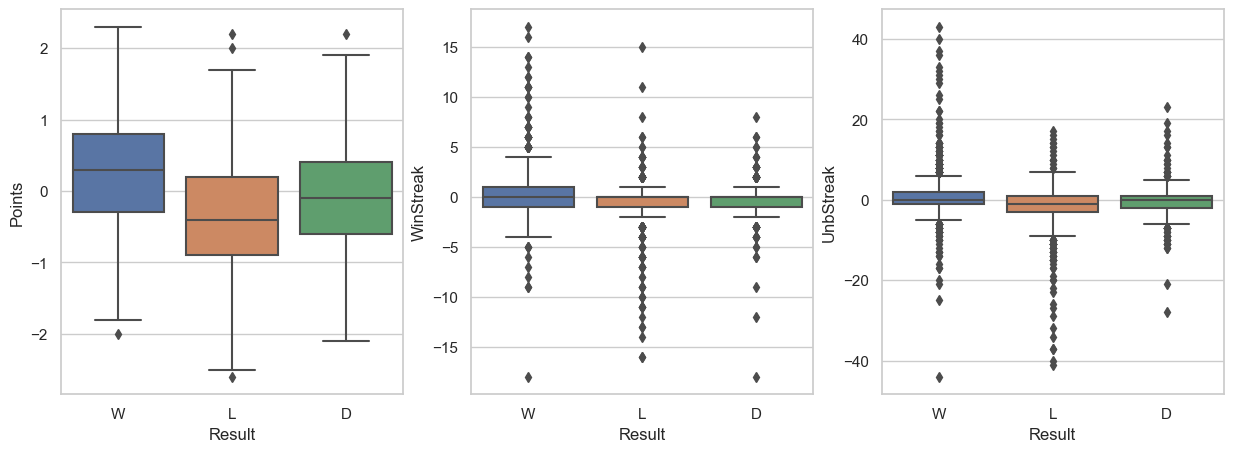

<Figure size 640x480 with 0 Axes>

In [21]:
# Points, WinStreak and UnbStreak

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df["Result"], y=df['Points'])

plt.subplot(1, 3, 2)
sns.boxplot(x=df["Result"], y=df['WinStreak'])

plt.subplot(1, 3, 3)
sns.boxplot(x=df["Result"], y=df['UnbStreak'])

plt.show()
plt.tight_layout()

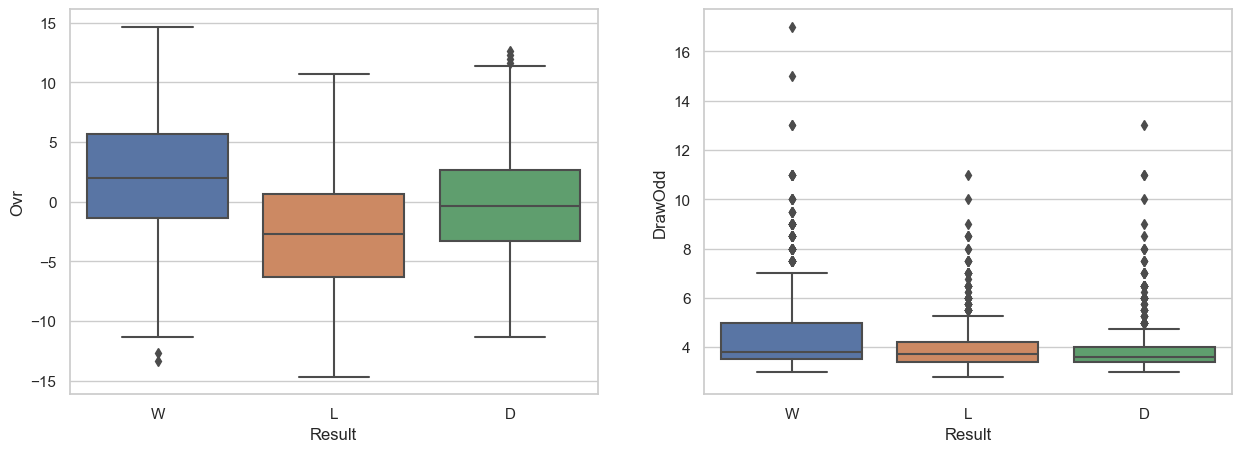

<Figure size 640x480 with 0 Axes>

In [25]:
# Ovr and DrawOdd

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Result"], y=df['Ovr'])

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Result"], y=df['DrawOdd'])

plt.show()
plt.tight_layout()

We will eliminate features with obvious overlapping boxplots.

In [26]:
df = df.drop(['Days', 'Fouls', 'YCards', 'RCards', 'WinStreak'], axis=1)

In [27]:
df.head()

,Referee,Day Of Week,Round,Shots,Corners,Points,UnbStreak,Ovr,DrawOdd,Venue,Result
0,P Dowd,Wed,0.0,4.8,2.3,0.4,1.0,4.00,4.5,Anfield,W
1,A Taylor,Sat,0.0,-1.0,-0.6,-0.5,0.0,-3.33,3.4,DW Stadium,L
2,L Mason,Sat,0.0,-5.0,-1.0,-0.5,0.0,-4.33,3.4,Madejski Stadium,W
3,R East,Sat,0.0,2.0,0.9,-0.2,1.0,-2.00,3.5,The Hawthorns,W
4,M Jones,Sat,0.0,0.1,-0.9,-0.1,0.0,0.34,3.4,Loftus Road,W


In [28]:
df.shape

(2559, 11)

## 3.3 BORUTA Feature Selection

In [29]:
df.head()

,Referee,Day Of Week,Round,Shots,Corners,Points,UnbStreak,Ovr,DrawOdd,Venue,Result
0,P Dowd,Wed,0.0,4.8,2.3,0.4,1.0,4.00,4.5,Anfield,W
1,A Taylor,Sat,0.0,-1.0,-0.6,-0.5,0.0,-3.33,3.4,DW Stadium,L
2,L Mason,Sat,0.0,-5.0,-1.0,-0.5,0.0,-4.33,3.4,Madejski Stadium,W
3,R East,Sat,0.0,2.0,0.9,-0.2,1.0,-2.00,3.5,The Hawthorns,W
4,M Jones,Sat,0.0,0.1,-0.9,-0.1,0.0,0.34,3.4,Loftus Road,W


In [30]:
from sklearn.preprocessing import LabelEncoder

# label encode referee categorical data
ref_le = LabelEncoder()
df['Referee'] = ref_le.fit_transform(df['Referee'])

# label encode day_of_week categorical data
dayOfWeek_le = LabelEncoder()
df['Day Of Week'] = dayOfWeek_le.fit_transform(df['Day Of Week'])

# label encode venue categorical data
venue_le = LabelEncoder()
df['Venue'] = venue_le.fit_transform(df['Venue'])

In [31]:
# dict(zip(venue_le.classes_, range(len(venue_le.classes_))))

In [32]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [33]:
y = df.Result
X = df.drop(columns="Result", axis=1)
colnames = X.columns

# using the BorutaPy function
rf = RandomForestClassifier(n_jobs = -1, class_weight="balanced_subsample", max_depth=5)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector.fit(X.values, y.values.ravel())

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

boruta_score

,Features,Score
3,Shots,1.00
4,Corners,1.00
5,Points,1.00
6,UnbStreak,1.00
7,Ovr,1.00
8,DrawOdd,1.00
9,Venue,0.75
0,Referee,0.50
1,Day Of Week,0.25
2,Round,0.00


In [34]:
# drop features with less than 0.5
treshold = 0.5
elim_features = boruta_score[boruta_score['Score'] < treshold]['Features'].tolist()

df = df.drop(elim_features, axis=1)

In [35]:
df.head()

,Referee,Shots,Corners,Points,UnbStreak,Ovr,DrawOdd,Venue,Result
0,26,4.8,2.3,0.4,1.0,4.00,4.5,0,W
1,3,-1.0,-0.6,-0.5,0.0,-3.33,3.4,8,L
2,15,-5.0,-1.0,-0.5,0.0,-4.33,3.4,20,W
3,28,2.0,0.9,-0.2,1.0,-2.00,3.5,30,W
4,21,0.1,-0.9,-0.1,0.0,0.34,3.4,18,W


In [43]:
df.columns

Index(['Referee', 'Shots', 'Corners', 'Points', 'UnbStreak', 'Ovr', 'DrawOdd',
       'Venue', 'Result'],
      dtype='object')

In [36]:
df.shape

(2559, 9)

In [37]:
df.Result.value_counts()

W    1179
L     794
D     586
Name: Result, dtype: int64

# 4. Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Finding Best Parameters for Models on Draw/ Non-Draw

In [39]:
# draw/ non-draw df
dnd_df = df.copy()

# label encode categorical data
dnd_df['Result'] = dnd_df['Result'].map({'D': 0, 'W': 1, 'L': 1})

In [40]:
# find the best parameter for each model on the whole dataset first

X = dnd_df.iloc[:, :-1]
y = dnd_df.iloc[:, -1]

# split to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# numerical value standardization
dnd_sc = StandardScaler()
X_train.iloc[:, :] = dnd_sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = dnd_sc.transform(X_test.iloc[:, :])

In [41]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# get the best parameters
print(rf_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}


In [37]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
lr_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
lr_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = lr_classifier.predict(X_test)

# get the best parameters
print(lr_classifier.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}


In [38]:
from sklearn.svm import SVC

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

# get the best parameters
print(svc_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

# get the best parameters
print(xgb_classifier.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}


### Finding Best Parameters for Models on Win/ Draw/ Lose

In [40]:
# win/draw/lose
wdl_df = df.copy()

# label encode categorical data
wdl_le = LabelEncoder()
wdl_df['Result'] = wdl_le.fit_transform(wdl_df['Result'])

In [41]:
dict(zip(wdl_le.classes_, range(len(wdl_le.classes_))))

{'D': 0, 'L': 1, 'W': 2}

In [42]:
# find the best parameter for each model on the whole dataset first

X = wdl_df.iloc[:, :-1]
y = wdl_df.iloc[:, -1]

# split to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# numerical value standardization
wdl_sc = StandardScaler()
X_train.iloc[:, :] = wdl_sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = wdl_sc.transform(X_test.iloc[:, :])

In [43]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# get the best parameters
print(rf_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}


In [44]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
lr_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
lr_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = lr_classifier.predict(X_test)

# get the best parameters
print(lr_classifier.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}


In [45]:
from sklearn.svm import SVC

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

# get the best parameters
print(svc_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

# get the best parameters
print(xgb_classifier.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 140}


### Finding Best Parameters for Models on Draw/ Lose

In [47]:
# win/draw/lose
dl_df = df.copy()

dl_df = dl_df[(dl_df['Result'] == 'D') | (dl_df['Result'] == 'L')]

# label encode categorical data
dl_le = LabelEncoder()
dl_df['Result'] = dl_le.fit_transform(dl_df['Result'])

In [48]:
dict(zip(dl_le.classes_, range(len(dl_le.classes_))))

{'D': 0, 'L': 1}

In [49]:
# find the best parameter for each model on the whole dataset first

X = dl_df.iloc[:, :-1]
y = dl_df.iloc[:, -1]

# split to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# numerical value standardization
dl_sc = StandardScaler()
X_train.iloc[:, :] = dl_sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = dl_sc.transform(X_test.iloc[:, :])

In [50]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# get the best parameters
print(rf_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}


In [51]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
lr_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
lr_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = lr_classifier.predict(X_test)

# get the best parameters
print(lr_classifier.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


In [52]:
from sklearn.svm import SVC

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

# get the best parameters
print(svc_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

# get the best parameters
print(xgb_classifier.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 60}
